In [3]:
# Toy covariates and observations
import numpy as np
import torch
#np.random.seed(0); torch.manual_seed(0)
from cebmf_torch.cebnm.cov_sharp_gb_prior import  sharp_cgb_posterior_means
from matplotlib import pyplot as plt
from cebmf_torch.cebnm.cov_gb_prior import   cgb_posterior_means
N, P = 2000, 1
X = np.random.randn(N, P)

# simulate π0(x) from a linear rule then generate θ and x
w = torch.randn(P) * 0.7
logit = torch.from_numpy(X).float().matmul(w) * 0.8
pi0_true = torch.sigmoid(logit)
z = (torch.rand(N) < pi0_true).float()  # 1 = spike
mu_true, omega = 2.0, 0.25
sigma_true = omega * mu_true

# truncated-normal slab
slab = torch.normal(mu_true, sigma_true, size=(N,))
slab = torch.clamp(slab, min=0.0)
theta = (1 - z) * slab  # spike at 0 with prob pi0_true
se = torch.full((N,), 0.5)
x = theta + torch.randn(N) * se

res = cgb_posterior_means(X, x, se,  n_epochs=50 ) 
res_sharp = sharp_cgb_posterior_means(X, x, se,  n_epochs=50 ) 


[CGB] Epoch 10/50, Loss=2.3169, mu2=0.153, sigma2=1.938
[CGB] Epoch 20/50, Loss=2.2840, mu2=0.315, sigma2=1.776
[CGB] Epoch 30/50, Loss=2.2455, mu2=0.483, sigma2=1.463
[CGB] Epoch 40/50, Loss=2.1988, mu2=0.657, sigma2=1.364
[CGB] Epoch 50/50, Loss=2.1534, mu2=0.833, sigma2=1.216
[CGB] Epoch   1/50 | Loss=2.179339 | mu=1.0101 | sigma=0.2020 | mean π0=0.3816
[CGB] Epoch  10/50 | Loss=2.010871 | mu=1.1018 | sigma=0.2204 | mean π0=0.3927
[CGB] Epoch  20/50 | Loss=1.870682 | mu=1.2044 | sigma=0.2409 | mean π0=0.4193
[CGB] Epoch  30/50 | Loss=1.753886 | mu=1.3049 | sigma=0.2610 | mean π0=0.4233
[CGB] Epoch  40/50 | Loss=1.658725 | mu=1.4011 | sigma=0.2802 | mean π0=0.4585
[CGB] Epoch  50/50 | Loss=1.586016 | mu=1.4911 | sigma=0.2982 | mean π0=0.4652


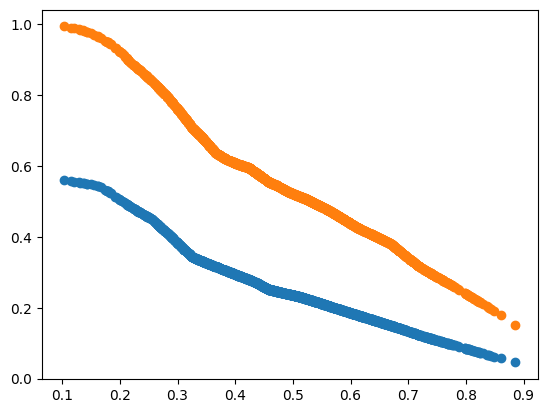

In [6]:
plt.scatter(pi0_true,1- res.pi )
plt.scatter(pi0_true, 1-res_sharp.pi0 )


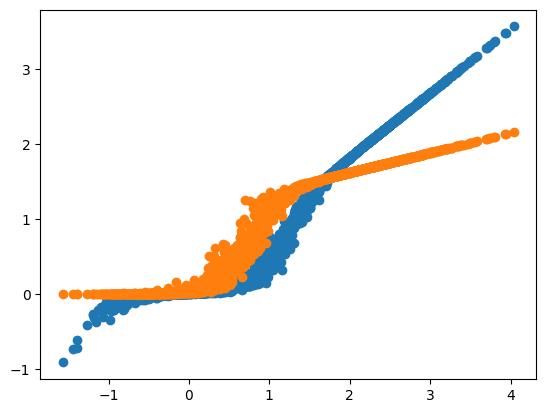

In [7]:
plt.scatter(x,res.post_mean )
plt.scatter(x,res_sharp.post_mean )

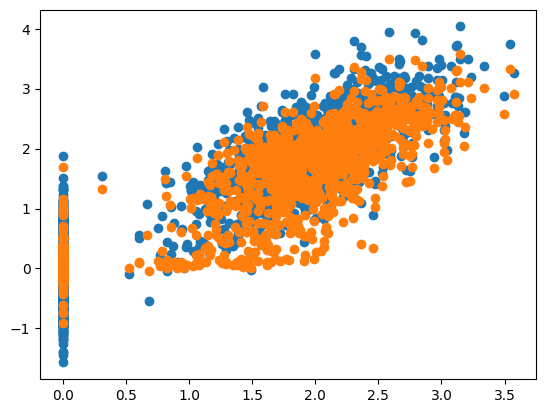

In [8]:
plt.scatter(theta,x)
plt.scatter(theta,res.post_mean)

In [ ]:
# Minimal run
import numpy as np
torch.manual_seed(0); np.random.seed(0)
N, P = 1000, 4
X = np.random.randn(N, P)
w = torch.randn(P) * 0.6
pi0_true = torch.sigmoid(torch.from_numpy(X).float() @ w)
z = torch.bernoulli(pi0_true)
mu_true, omega = 2.0, 0.25
sigma_true = omega * mu_true
slab = torch.clamp(torch.normal(mu_true, sigma_true, size=(N,)), min=0.0)
theta = (1 - z) * slab
se = torch.full((N,), 0.5)
x = theta + torch.randn(N) * se

res = sharp_cgb_posterior_means(X, x, se, omega=omega, n_epochs=140, verbose_every=10)
print("μ̂, σ̂, mean π̂0:", res.mu, res.sigma, res.pi0.mean().item())


[CGB] Epoch   1/140 | Loss=2.096451 | mu=1.0050 | sigma=0.2513 | mean π0=0.4955
[CGB] Epoch  10/140 | Loss=1.881146 | mu=1.0506 | sigma=0.2627 | mean π0=0.4094
[CGB] Epoch  20/140 | Loss=1.796797 | mu=1.1015 | sigma=0.2754 | mean π0=0.4160
[CGB] Epoch  30/140 | Loss=1.723240 | mu=1.1520 | sigma=0.2880 | mean π0=0.4308
[CGB] Epoch  40/140 | Loss=1.656888 | mu=1.2022 | sigma=0.3005 | mean π0=0.4354
[CGB] Epoch  50/140 | Loss=1.596899 | mu=1.2513 | sigma=0.3128 | mean π0=0.4401
[CGB] Epoch  60/140 | Loss=1.542605 | mu=1.2991 | sigma=0.3248 | mean π0=0.4469
[CGB] Epoch  70/140 | Loss=1.495828 | mu=1.3455 | sigma=0.3364 | mean π0=0.4380
[CGB] Epoch  80/140 | Loss=1.451958 | mu=1.3904 | sigma=0.3476 | mean π0=0.4495
[CGB] Epoch  90/140 | Loss=1.413971 | mu=1.4334 | sigma=0.3583 | mean π0=0.4717
[CGB] Epoch 100/140 | Loss=1.380556 | mu=1.4742 | sigma=0.3686 | mean π0=0.4662
[CGB] Epoch 110/140 | Loss=1.351791 | mu=1.5130 | sigma=0.3783 | mean π0=0.4733
[CGB] Epoch 120/140 | Loss=1.326205 | mu